In [466]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Reading files 
venues= pd.read_csv(r"C:\Users\HP.Com\Desktop\HAMZA\advanced_projects_working\eda_cricket_analysis\ICC Cricket World Cup\venues.csv")
players= pd.read_csv(r"C:\Users\HP.Com\Desktop\HAMZA\advanced_projects_working\eda_cricket_analysis\ICC Cricket World Cup\players.csv")
teams= pd.read_csv(r"C:\Users\HP.Com\Desktop\HAMZA\advanced_projects_working\eda_cricket_analysis\ICC Cricket World Cup\teams.csv")
matches= pd.read_csv(r"C:\Users\HP.Com\Desktop\HAMZA\advanced_projects_working\eda_cricket_analysis\ICC Cricket World Cup\matches.csv")
innings= pd.read_csv(r"C:\Users\HP.Com\Desktop\HAMZA\advanced_projects_working\eda_cricket_analysis\ICC Cricket World Cup\innings.csv")
overHistory= pd.read_csv(r"C:\Users\HP.Com\Desktop\HAMZA\advanced_projects_working\eda_cricket_analysis\ICC Cricket World Cup\overHistory.csv")
overBallDetails= pd.read_csv(r"C:\Users\HP.Com\Desktop\HAMZA\advanced_projects_working\eda_cricket_analysis\ICC Cricket World Cup\overBallDetails.csv")

In [468]:
#Dropping missing values 
venues.dropna(inplace=True)
players.dropna(subset=['nationality'],inplace=True)
players.drop(['dateOfBirth'],axis=1,inplace=True)
teams.dropna(subset=["wicketKeeperId"],inplace=True)
matches.drop(['umpire.name.5','matchSummary','match.summary','matchStatus','matchStatus_victoryMarginInningsRuns','matchStatus_victoryMarginRuns','matchStatus_victoryMarginWickets','totalBalls','matchDateMs','matchEndDateMs','matchEndDate','oversLimit', 'isLimitedOvers'],axis=1,inplace=True)
matches.dropna(subset=['matchStatus_outcome'],inplace=True)
innings.drop(['battingTeamId','bowlingTeamId'],axis=1,inplace=True)
overHistory.drop(['ovBalls/6','ovBalls/7','ovBalls/8','ovBalls/9','ovBalls/10','ovBalls/11', 'ovBalls/12', 'ovBalls/13','bowlerId'],axis=1,inplace=True)
overBallDetails.dropna(inplace=True)

In [469]:
#Imputing missing values
players['bowlingStyle'].fillna('Unknown',inplace=True)
matches['toss.elected'].fillna('Unknown',inplace=True)
matches['toss.winner'].fillna('Unknown',inplace=True)
overHistory['ovBalls/1'].fillna(overHistory['ovBalls/1'].mode()[0], inplace=True)
overHistory['ovBalls/2'].fillna(overHistory['ovBalls/2'].mode()[0], inplace=True)
overHistory['ovBalls/3'].fillna(overHistory['ovBalls/3'].mode()[0], inplace=True)
overHistory['ovBalls/4'].fillna(overHistory['ovBalls/4'].mode()[0], inplace=True)
overHistory['ovBalls/5'].fillna(overHistory['ovBalls/5'].mode()[0], inplace=True)
#Data-consistency 
players['nationality'].replace({'PK':'Pakistani'},inplace=True)


In [470]:
#Changing datatypes accordingly
teams['wicketKeeperId'] = teams['wicketKeeperId'].astype('int64')
teams['captainId'] = teams['captainId'].astype('int64')
overBallDetails['bowlerId']=overBallDetails['bowlerId'].astype('int64')
overBallDetails['facingBatsmanId']=overBallDetails['facingBatsmanId'].astype('int64')

In [471]:
#joining_tables
matches_venues=pd.merge(matches,venues,left_on='venueId',right_on='id',how='inner')
matches_innings=pd.merge(matches,innings,left_on='id',right_on='matchId',how='inner')

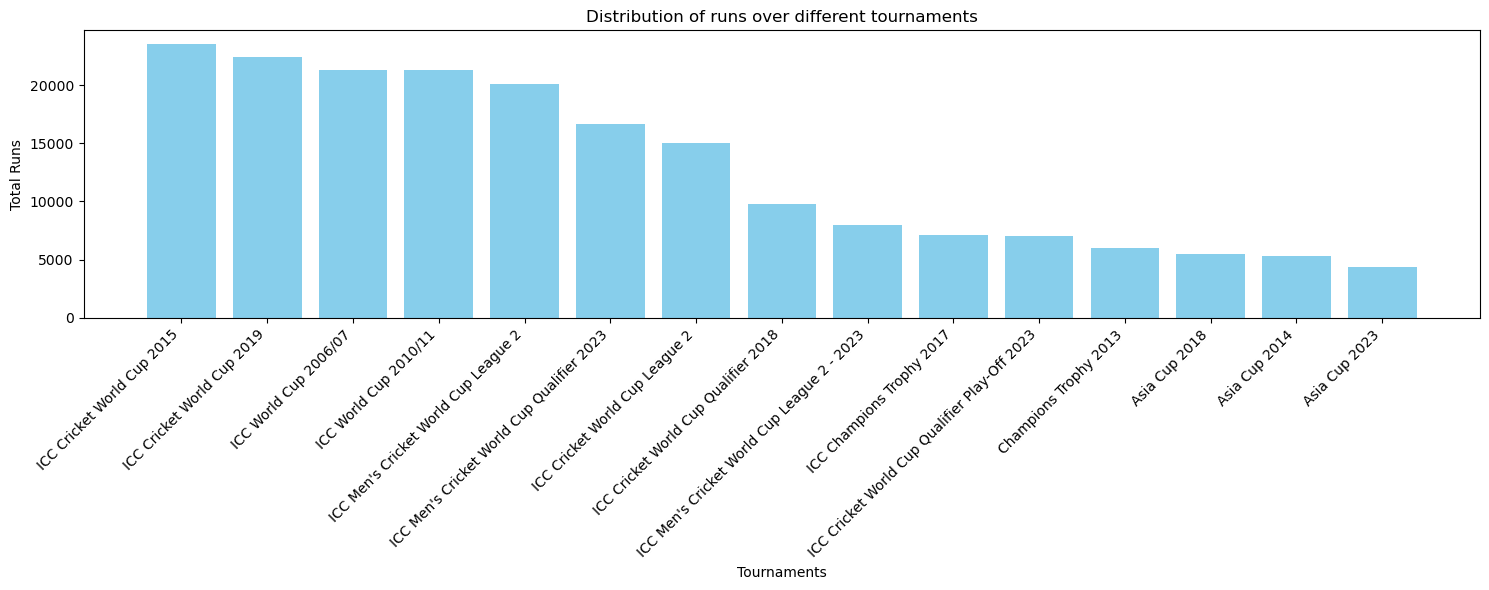

In [472]:
#Distribution of runs over different tournaments
agg_data = matches_innings.groupby('tournamentLabel')['runs'].sum().reset_index()
top_15_data = agg_data.nlargest(15, 'runs')
# Plotting
plt.figure(figsize=(15, 6))
plt.bar(top_15_data['tournamentLabel'], top_15_data['runs'], color='skyblue')
plt.title('Distribution of runs over different tournaments')
plt.xlabel('Tournaments')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


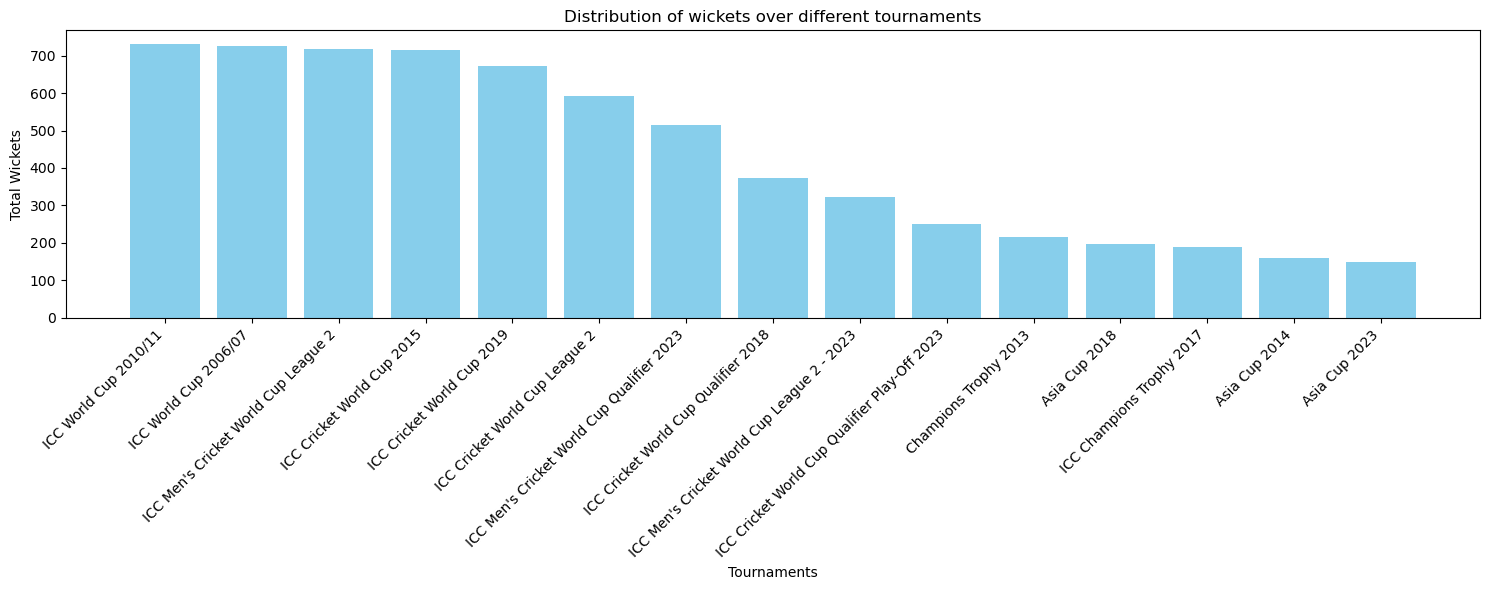

In [473]:
#Distribution of wickets over different tournaments
wickets_by_tournament = matches_innings.groupby('tournamentLabel')['wkts'].sum().reset_index()
agg_data = matches_innings.groupby('tournamentLabel')['wkts'].sum().reset_index()
top_15_data = agg_data.nlargest(15, 'wkts')

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(top_15_data['tournamentLabel'], top_15_data['wkts'], color='skyblue')
plt.title('Distribution of wickets over different tournaments')
plt.xlabel('Tournaments')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

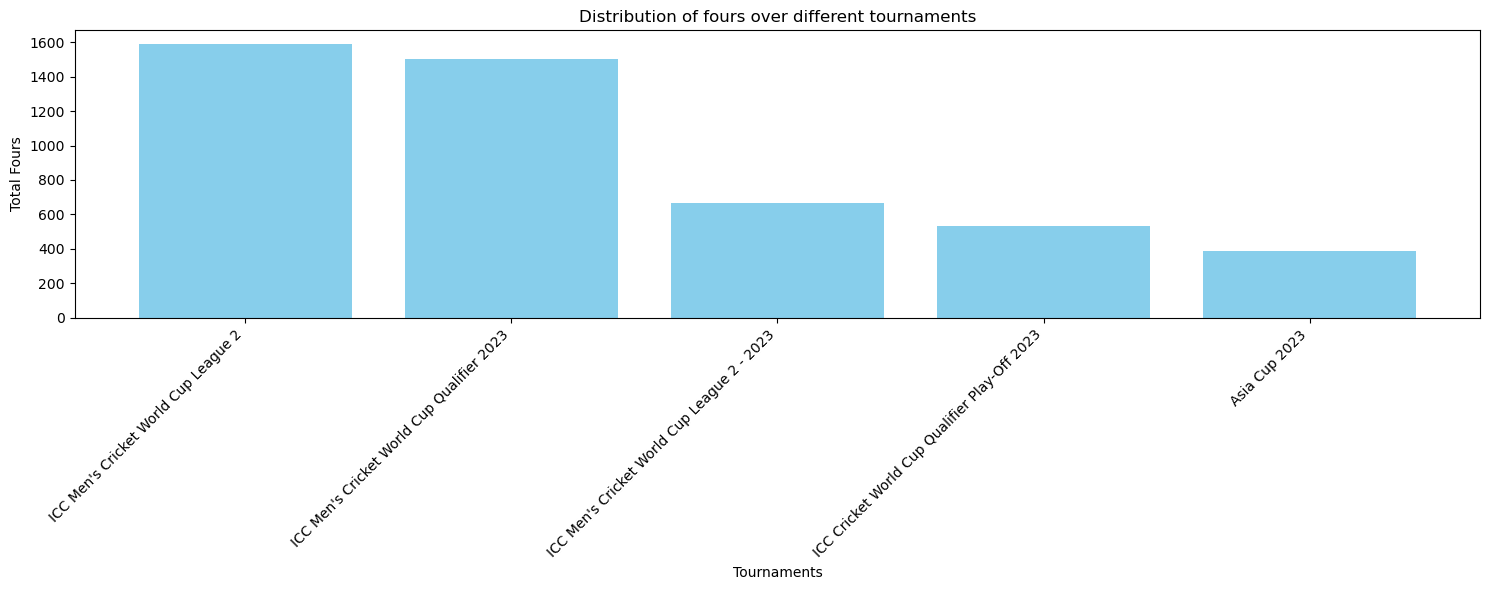

In [474]:
#Distribution of fours over different tournaments
fours_by_tournament = matches_innings.groupby('tournamentLabel')['fours'].sum().reset_index()
agg_data = matches_innings.groupby('tournamentLabel')['fours'].sum().reset_index()
top_15_data = agg_data.nlargest(5, 'fours')

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(top_15_data['tournamentLabel'], top_15_data['fours'], color='skyblue')
plt.title('Distribution of fours over different tournaments')
plt.xlabel('Tournaments')
plt.ylabel('Total Fours')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

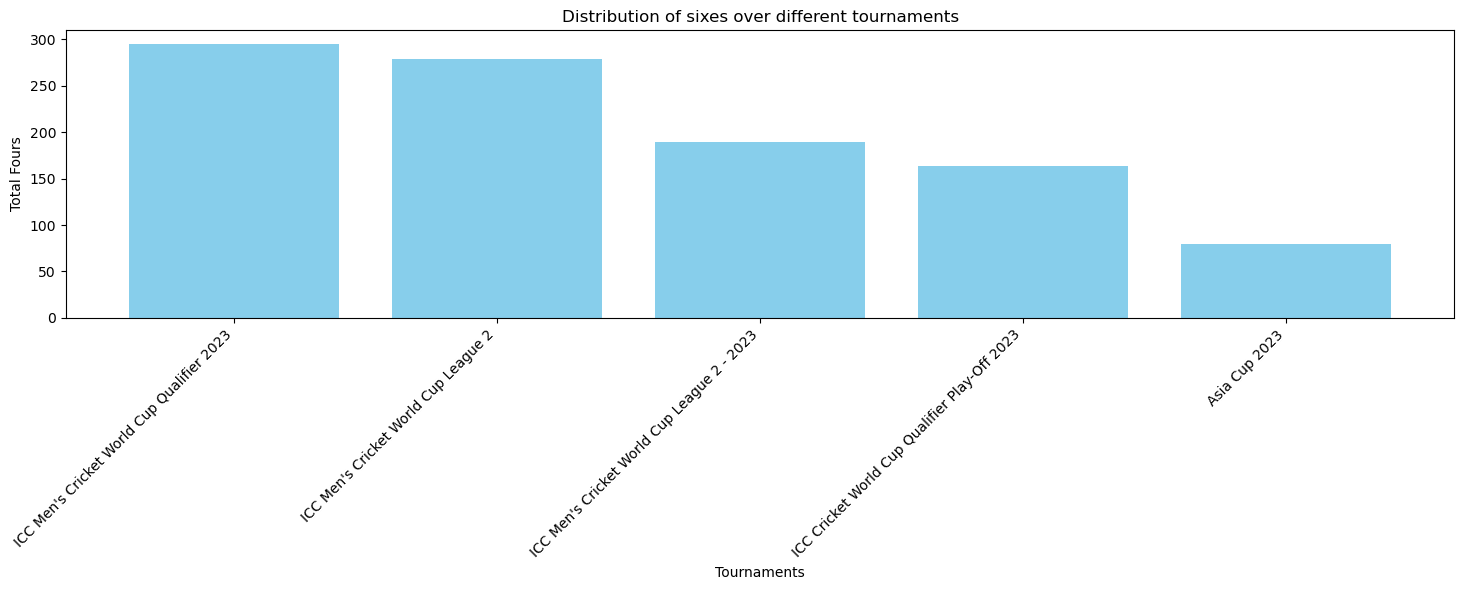

In [475]:
#Distribution of sixes over different tournaments
sixes_by_tournament = matches_innings.groupby('tournamentLabel')['sixes'].sum().reset_index()
agg_data = matches_innings.groupby('tournamentLabel')['sixes'].sum().reset_index()
top_15_data = agg_data.nlargest(5, 'sixes')

# Plotting
plt.figure(figsize=(15, 6))
plt.bar(top_15_data['tournamentLabel'], top_15_data['sixes'], color='skyblue')
plt.title('Distribution of sixes over different tournaments')
plt.xlabel('Tournaments')
plt.ylabel('Total Fours')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

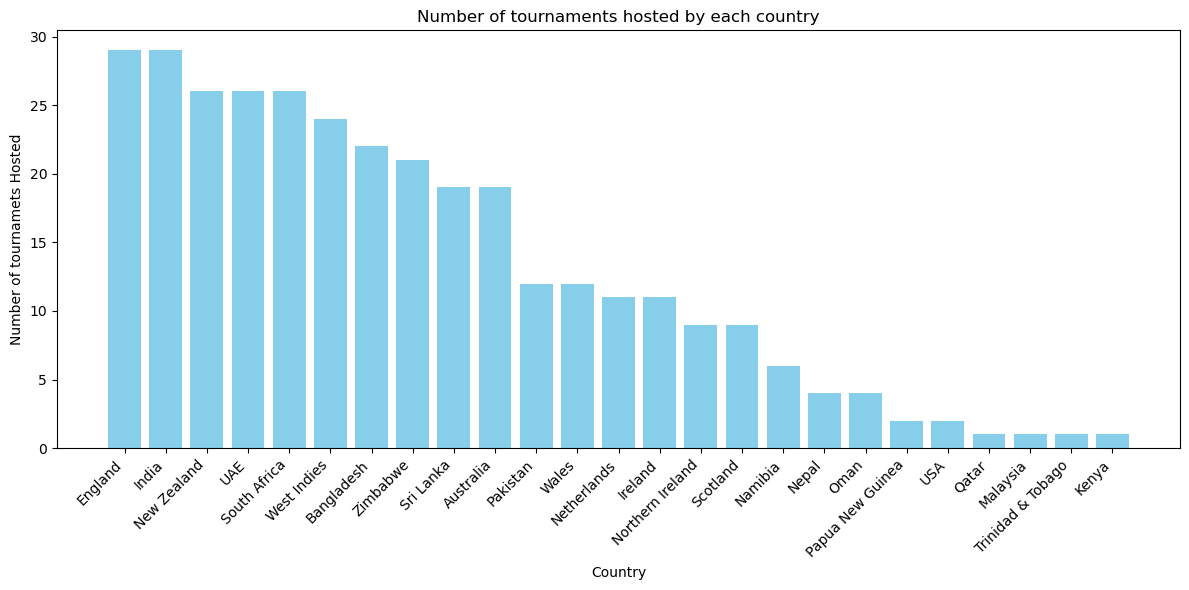

In [476]:
#Tournaments hosted by each country 
tournaments_hosted=matches_venues.groupby('country')['tournamentLabel'].nunique().reset_index()
tournaments_hosted=tournaments_hosted.sort_values(by='tournamentLabel',ascending=False)
#visualization
plt.figure(figsize=(12,6))
plt.bar(tournaments_hosted['country'],tournaments_hosted['tournamentLabel'],color='skyblue')
plt.title("Number of tournaments hosted by each country")
plt.xlabel('Country')
plt.ylabel('Number of tournamets Hosted')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

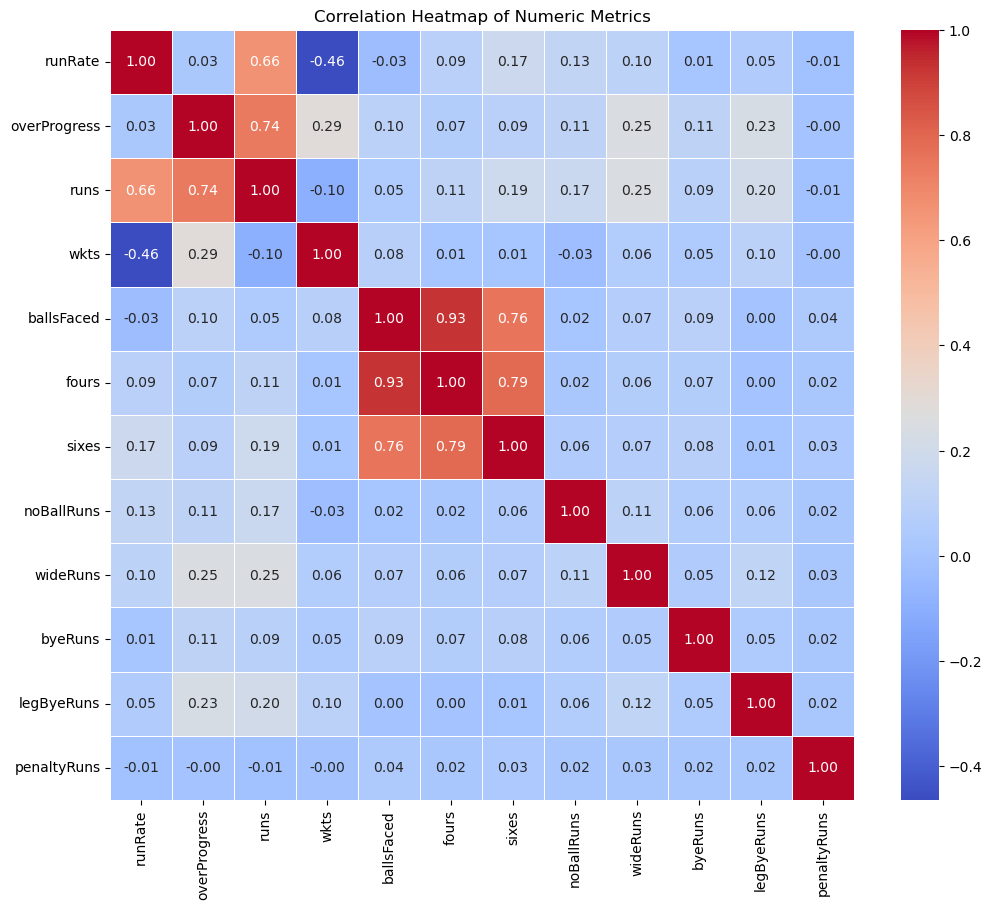

In [477]:
# Replace 'non_numeric_columns' with the actual non-numeric column names
filtered_matches_innings=matches_innings.drop(columns=['id_x', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchStatus_outcome', 'matchStatus_text', 'description',
       'matchType', 'tournamentLabel', 'id_y', 'matchId','inningsNumber'])
# Exclude non-numeric columns
numeric_df = filtered_matches_innings.select_dtypes(include=['float64', 'int64'])
# Create a correlation matrix
correlation_matrix = numeric_df.corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# Add a title
plt.title("Correlation Heatmap of Numeric Metrics")

# Show the plot
plt.show()

